In [1]:
%reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tk
import os
import ntpath
import re
from matplotlib.colors import ListedColormap

from matplotlib import rc, rcParams

from scipy.optimize import curve_fit
import matplotlib as mpl
from matplotlib import rc, rcParams
from sklearn.metrics import r2_score

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
plt.rcParams["font.family"] = "Arial"

plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.fonttype'] = 42

mpl.font_manager.FontManager()


# make the numbers on axis bold
rc('font', weight='bold')

In [3]:
# read the .out files and get Cv values
Cvs_dft = []
gauss_outs = []
output_counter = 0
Cvs_read_counter = 0
output_names = []

Not_converged = []

for filename in os.listdir():
    if filename.endswith(".out"):
        #print(os.path.join( filename))
        gauss_out = ntpath.basename(filename)
        gauss_outs.append(gauss_out)
        output_counter += 1
    elif filename.endswith(".csv"):
        Desired_Cvs = os.path.join(filename)
    else:
        continue
#print (Desired_Cvs)
for gauss in gauss_outs:
    convergence_check = 0
    f = open(gauss,'r')
    liness = f.readlines()
    #print (liness[-1])
    for count, line in enumerate(liness):
        if re.search('CV', line, re.IGNORECASE):
            Cvs_read_counter += 1
            convergence_check = 1
            cv_line = liness[count+2].split()
            output_names.append(gauss)
            #print (cv_line[2])
            Cvs_dft.append(float(cv_line[2].replace("'","")))
    if convergence_check == 0:
        print ("gauss did not converged properly", gauss)
        Not_converged.append(gauss)
    
            
            

            #for string in line:

print ("Total output files: ", output_counter)
print ("Total successfully read Cvs: ", Cvs_read_counter)
print ("all done")
#search through the excel file to find Desired Cv
#ff = open(Desired_Cvs,'r')
gen_desired = pd.read_csv(Desired_Cvs)
#gen_desired = gen_desired.reset_index()
print ("number of Cvs in the desired cvs file: ", len(gen_desired))
# get rid of .out form output files
output_names = [i.replace(".out","") for i in output_names]
print ("output names before conversion--------------------->\n", output_names)
print ("{} of .out gaussian files".format(len(output_names)))

for jj,ii in enumerate(output_names):
    p_counter = 0
    for kk,char in enumerate(ii):
        if char=="p":
            p_counter +=1
            if p_counter%2 ==1:
                output_names[jj] = output_names[jj][:kk+1].replace("p","(")+\
                                   output_names[jj][kk+1:]
            else:
                output_names[jj] = output_names[jj][:kk+1].replace("p",")")+\
                                   output_names[jj][kk+1:]
        
        # insert "=" instead of "d", "#" instead of "t" 
        output_names[jj] = output_names[jj].replace("d","=")
        output_names[jj] = output_names[jj].replace("t","#")

print ("output names after conversion------------------------->\n ", output_names)

# choose the SMILES that we have DFT values

# create .csv file
dft_smiles_cv = {}
for smile in output_names:
    dft_smiles_cv['SMILES'] = output_names 
    dft_smiles_cv['DFT_cv'] = Cvs_dft

    #output['Desired_cv'] = gen_desired['cv']

dft_smiles_cv = pd.DataFrame(dft_smiles_cv)
merged_output = pd.merge(gen_desired, dft_smiles_cv, on='SMILES') 
merged_output["RE_des"] = np.abs((merged_output["DFT_cv"] - merged_output["des_cv"])/ merged_output["DFT_cv"]*100)
merged_output["RE_pred"] = np.abs((merged_output["DFT_cv"] - merged_output["pred_cv"])/ merged_output["DFT_cv"]*100)


output = pd.DataFrame(merged_output)
output['Err_pred_des'] = output['Err_pred_des']*100
output.to_csv('./output/output_{}'.format(Desired_Cvs), index=False)

print ("average of RE_des: {} and Min: {} and Max: {}".\
       format(np.mean(np.abs(merged_output["RE_des"])), min(merged_output["RE_des"]), max(merged_output["RE_des"])))
print ("average of RE_pred: {} and Min: {} and Max: {}".\
       format(np.mean(np.abs(merged_output["RE_pred"])), min(merged_output["RE_pred"]), max(merged_output["RE_pred"])))
print ("Total samples wrote in the output: ",len(output))


gauss did not converged properly C1CN2CC23CCC3N1.out
gauss did not converged properly C1OC2CCC3C1CC23.out
gauss did not converged properly CC1dCdCCNCC1C.out
gauss did not converged properly CCC1dCC1NNdO.out
gauss did not converged properly CCCCdCC1CdC1N.out
gauss did not converged properly CCN1CdNOCdC1F.out
gauss did not converged properly CtCCpOpCdCCC.out
gauss did not converged properly NdC1CdCNdNONdN1.out
gauss did not converged properly NdC1CdCOCdNNdC1.out
gauss did not converged properly NdC1dCdCNdCONdC1.out
gauss did not converged properly Ndc1nccncn1.out
gauss did not converged properly NdCC1dCNdC2CdC2N1.out
gauss did not converged properly NtCC1dCCdNNpOpO1.out
Total output files:  518
Total successfully read Cvs:  505
all done
number of Cvs in the desired cvs file:  516
output names before conversion--------------------->
 ['C1C2C3CN1CC1C2C31', 'C1CC23CC24CC4C13', 'C1CC2C1NC1CCC12', 'C1CC2CC2C2CCC12', 'C1CC2CC3COC23C1', 'C1CC2CC3pCC3pC2O1', 'C1CC2CCC2CCO1', 'C1CC2COC2CO1', 'C1C

In [4]:
# Separate Not-converged ones in a .csv
Not_converged_ = [names.replace(".out", "") for names in Not_converged]

for jj,ii in enumerate(Not_converged_):
    p_counter = 0
    for kk,char in enumerate(ii):
        if char=="p":
            p_counter +=1
            if p_counter%2 ==1:
                Not_converged_[jj] = Not_converged_[jj][:kk+1].replace("p","(")+\
                                   Not_converged_[jj][kk+1:]
            else:
                Not_converged_[jj] = Not_converged_[jj][:kk+1].replace("p",")")+\
                                   Not_converged_[jj][kk+1:]
        
        # insert "=" instead of "d", "#" instead of "t" 
        Not_converged_[jj] = Not_converged_[jj].replace("d","=")
        Not_converged_[jj] = Not_converged_[jj].replace("t","#")

list_cvs_notconv = []

for i in Not_converged_:
    mask = gen_desired['SMILES'] == i
    pos = np.flatnonzero(mask)
    list_cvs_notconv.append(int(pos))

Not_converged_df = gen_desired.iloc[list_cvs_notconv]

Not_converged_df.to_csv('./output/{}.csv'.format(f'Not_converged_df'), index=False)

In [58]:
np.arange(20, 55, 5)

array([20, 25, 30, 35, 40, 45, 50])

500


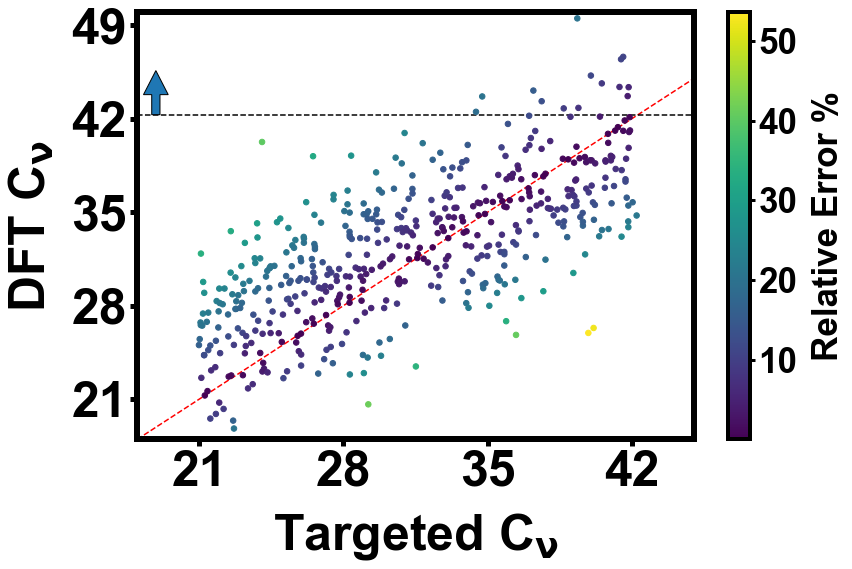

In [6]:
# Science prefers the following font
#Use a sans-serif font whenever possible (we prefer Helvetica).
#plt.rcParams['ps.useafm'] = True
#plt.rcParams['pdf.fonttype'] = 42
#mpl.font_manager.FontManager()
# make the numbers on axis bold
#rc('font', weight='bold')

CV_range = (18, 50)
Targ_CV_range = (18, 45)
cMap = ListedColormap(['white', 'green', 'blue','red'])

Desired_cv = output["des_cv"]
DFT_cv = output["DFT_cv"]
coll = output["RE_des"]

col = np.abs((DFT_cv-Desired_cv)/DFT_cv*100)
col_orig = np.copy(col)

#plt.figure(figsize = (8, 7))
#mpl.rcParams['axes.linewidth'] = 3
fig, ax = plt.subplots(figsize = (15*0.8, 10*0.8))
plt.scatter(Desired_cv, DFT_cv, s=30, c=col)

ax.tick_params(axis='both', which='major', labelsize=50, width=5, length=7)
[i.set_linewidth(6) for i in ax.spines.values()]

plt.xlabel(r'Targeted C$\mathbf{_\nu}$', fontsize=50, fontname='Arial', fontweight="bold", labelpad=15)
plt.ylabel(r'DFT C$\mathbf{_\nu}$', fontsize=50, fontname='Arial', fontweight="bold", labelpad=15)

plt.xlim(Targ_CV_range)
plt.ylim(CV_range)
# how many numbers on the axes, delta
ax.xaxis.set_major_locator(tk.MultipleLocator(7))
ax.yaxis.set_major_locator(tk.MultipleLocator(7))

lims=[CV_range[0], CV_range[1]]
plt.plot(lims, lims, '--',c='red', alpha=1, zorder=0)


cbar = plt.colorbar(shrink=1)
#cbar.set_ticks(loacator)
cbar.ax.set_ylabel('Relative Error %', fontsize=35, fontweight='bold', labelpad=15)
cbar.ax.tick_params(axis='both', which='major', labelsize=35, width=3, length=5)
[i.set_linewidth(4) for i in cbar.ax.spines.values()]

cbar.ax.yaxis.set_major_locator(tk.MultipleLocator(10))
cbar.solids.set_edgecolor("face")
#plt.draw()
limx = [CV_range[0], CV_range[1]]
lims = [42.3, 42.3]
plt.plot(limx, lims, '--', c='black', alpha=1, zorder=0)

ax.arrow(x=1.05*CV_range[0], y=42.3, dx=0, dy=1.5, width=0.4)

#ax.annotate("", x=(CV_range[0], 42.3), xytext=(CV_range[0], 42.3), arrowprops=dict(arrowstyle="->"))
plt.tight_layout()
plt.savefig('DFT_Des.jpeg', dpi=500, bbox_inches='tight')

print(len(output['des_cv']))

[0.502]
[0.314]
[0.184]


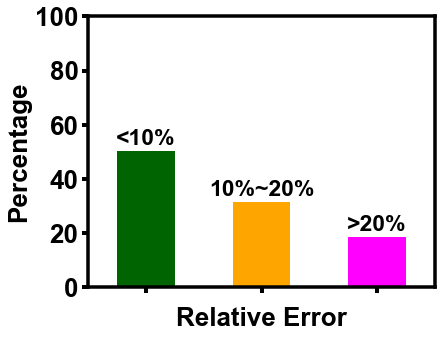

In [8]:
# make the numbers on axis bold
#rc('font', weight='bold')

re_less_10 = np.sum(output['RE_des'].values < 10)
print (re_less_10/output['RE_des'].shape)

re_less_20_big_10 = np.sum( (output['RE_des'].values > 10) &  (output['RE_des'].values < 20) )
print (re_less_20_big_10/output['RE_des'].shape)

re_big_20 = np.sum(output['RE_des'].values > 20)
print (re_big_20/output['RE_des'].shape)
plt.close()

plt.bar(['<10%', '10% - 20%', '>20%'],
        [re_less_10/len(output), re_less_20_big_10/len(output), re_big_20/len(output)],
        color = ['green', 'blue', 'red'],
        alpha = 0.7)

plt.close()
plt.figure(figsize = (7.8*0.8, 6*0.8))
frequencies = [re_less_10/len(output)*100, re_less_20_big_10/len(output)*100, re_big_20/len(output)*100]
freq_series = pd.Series(frequencies)
ax = freq_series.plot(kind='bar', color = ['darkgreen', 'orange', 'magenta'])



rects = ax.patches
x_labels = [ ]
labels = ['<10%', '10%~20%', '>20%']

# define the width of the border
[i.set_linewidth(3.5) for i in ax.spines.values()]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 1, label, fontsize=23, fontweight='bold',
            ha='center', va='bottom')

ax.set_xticklabels(x_labels)
plt.ylim(0,100)
ax.tick_params(axis='both', which='major', labelsize=26, width=4, length=6)
#plt.yticks(fontsize = 22)
plt.ylabel("Percentage", fontsize=26, fontweight='bold', fontname='Arial')
plt.xlabel("Relative Error", fontsize=26, fontweight='bold', labelpad=10, fontname='Arial')
plt.ylim (0, 100)
plt.tight_layout()
plt.savefig('RE_dft_des.jpeg', dpi=500, bbox_inches='tight')

In [9]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Desired_cv, DFT_cv)
print ('RMSE = ', mse**0.5)
print (r2_score(Desired_cv, DFT_cv))

RMSE =  4.543018705724202
0.4486860061951041


49.509
500


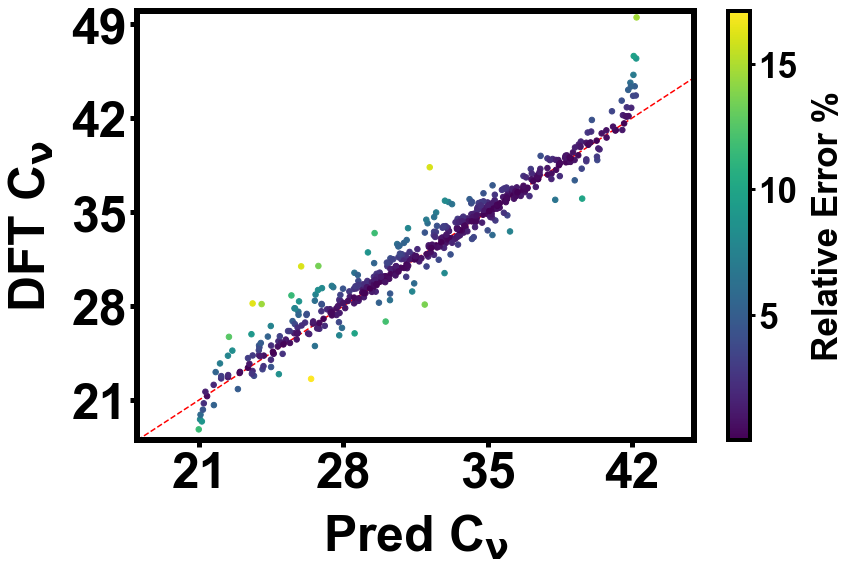

In [13]:
# make the numbers on axis bold

#rc('font', weight='bold')

CV_range = (18, 50)
pred_CV_range = (18, 45)
cMap = ListedColormap(['white', 'green', 'blue','red'])


predicted_cv = output["pred_cv"]
DFT_cv = output["DFT_cv"]
coll = output["RE_pred"]


col = np.abs((DFT_cv-predicted_cv)/DFT_cv*100)
col_orig = np.copy(col)

#plt.figure(figsize = (8, 7))
#mpl.rcParams['axes.linewidth'] = 2.5
fig, ax = plt.subplots(figsize = (15*0.8, 10*0.8))

plt.scatter(predicted_cv,DFT_cv, s=30, c=coll)
ax.tick_params(axis='both', which='major', labelsize=50, width=5, length=7)

plt.xlabel(r'Pred C$\mathbf{_\nu}$', fontsize=50, fontweight="bold", labelpad=15, fontname='Arial')
plt.ylabel(r'DFT C$\mathbf{_\nu}$', fontsize=50, fontweight="bold", labelpad=15, fontname='Arial')

plt.xlim(pred_CV_range)
plt.ylim(CV_range)
# how many numbers on the axes, delta
ax.xaxis.set_major_locator(tk.MultipleLocator(7))
ax.yaxis.set_major_locator(tk.MultipleLocator(7))
[i.set_linewidth(6) for i in ax.spines.values()]
lims=[CV_range[0], CV_range[1]]
plt.plot(lims, lims, '--',c='red', alpha=1, zorder=0)


cbar = plt.colorbar(shrink=1)

#cbar.ax.set_ticks(20)
#cbar.set_ticks(loacator)
cbar.ax.set_ylabel('Relative Error %', fontsize=35, fontweight='bold', labelpad=15, fontname='Arial')
cbar.ax.tick_params(axis='both', which='major', labelsize=35, width=3, length=5)
[i.set_linewidth(4) for i in cbar.ax.spines.values()]
cbar.ax.yaxis.set_major_locator(tk.MultipleLocator(5))
cbar.solids.set_edgecolor("face")
plt.draw()
plt.tight_layout()
plt.savefig('pred_dft.jpeg', dpi=500, bbox_inches='tight')

print (np.max(DFT_cv))
print (len(output["DFT_cv"]))

In [14]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(DFT_cv, predicted_cv)
print ('RMSE = ', mse**0.5)
print (r2_score(predicted_cv, DFT_cv))

RMSE =  1.2058713164769572
0.9453948317625589


[0.974]
[0.026]
[0.]


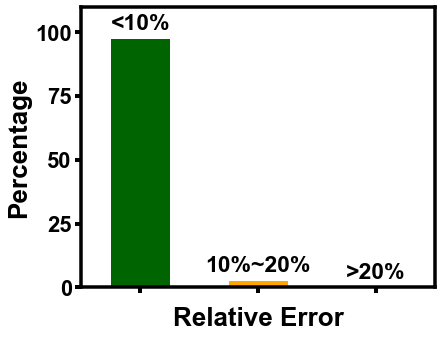

In [15]:
# make the numbers on axis bold
#rc('font', weight='bold')

re_less_10 = np.sum(output['RE_pred'].values < 10)
print (re_less_10/output['RE_pred'].shape)

re_less_20_big_10 = np.sum( (output['RE_pred'].values > 10) &  (output['RE_pred'].values < 20) )
print (re_less_20_big_10/output['RE_pred'].shape)

re_big_20 = np.sum(output['RE_pred'].values > 20)
print (re_big_20/output['RE_pred'].shape)
plt.close()
plt.figure(figsize = (7.8*0.8, 6*0.8))
frequencies = [re_less_10/len(output)*100, re_less_20_big_10/len(output)*100, re_big_20/len(output)*100]
freq_series = pd.Series(frequencies)
ax = freq_series.plot(kind='bar', color = ['darkgreen', 'orange', 'magenta'])
ax.tick_params(axis='both', which='major', labelsize=28, width=5)
rects = ax.patches
x_labels = [ ]
labels = ['<10%', '10%~20%', '>20%']
[i.set_linewidth(3.5) for i in ax.spines.values()]
i=0
for rect, label in zip(rects, labels):
    height = rect.get_height()
    if i==0:
        ax.text(rect.get_x() + rect.get_width() / 2, height + 2, label,fontsize = 23, fontweight='bold',
            ha='center', va='bottom')
    else:
        ax.text(rect.get_x() + rect.get_width() / 2, height + 2, label,fontsize = 23, fontweight='bold',
            ha='center', va='bottom')
    i += 1
ax.set_xticklabels(x_labels)

ax.tick_params(axis='both', which='major', labelsize=26, width=4, length=6)
plt.ylim(0,110)

plt.yticks(fontsize = 22)
plt.ylabel("Percentage", fontsize=26, fontweight='bold')
plt.xlabel("Relative Error", fontsize=26, fontweight='bold', labelpad=10)
plt.tight_layout()
plt.savefig('RE_pred_dft.jpeg', dpi=500, bbox_inches='tight')

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


42.2308
500


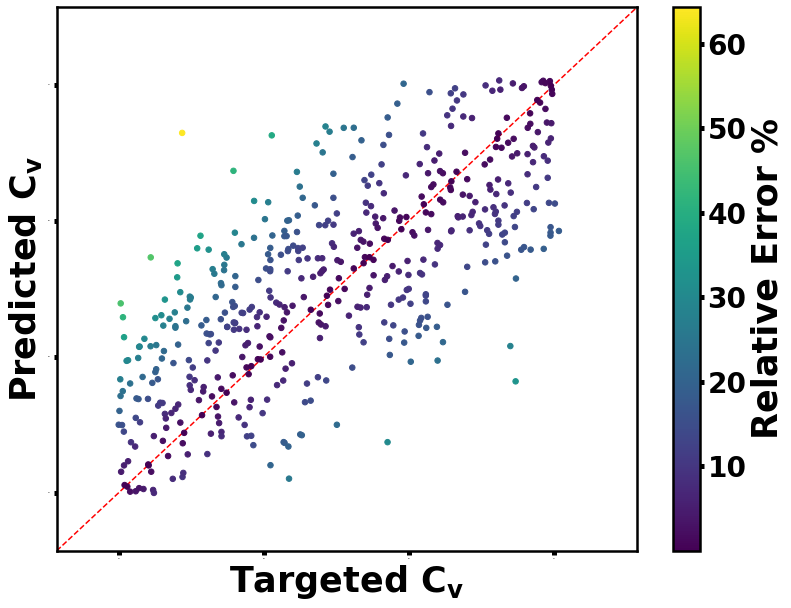

In [13]:
# make the numbers on axis bold

rc('font', weight='bold')

CV_range = (18, 46)
cMap = ListedColormap(['white', 'green', 'blue','red'])


predicted_cv = output["pred_cv"]
des_cv = output["des_cv"]

col = np.abs((predicted_cv - des_cv)/des_cv*100)
col_orig = np.copy(col)



#plt.figure(figsize = (8, 7))
mpl.rcParams['axes.linewidth'] = 2.5
fig, ax = plt.subplots(figsize = (13, 10))

plt.scatter(des_cv, predicted_cv, s=30, c=col)

ax.tick_params(axis='both', which='major', labelsize=1, width=5)

plt.xlabel(r'Targeted $\mathbf{C_v}$', fontsize=35, fontweight='bold')
plt.ylabel(r'Predicted $\mathbf{C_v}$', fontsize=35, fontweight="bold")

plt.xlim(CV_range)
plt.ylim(CV_range)
# how many numbers on the axes, delta
ax.xaxis.set_major_locator(tk.MultipleLocator(7))
ax.yaxis.set_major_locator(tk.MultipleLocator(7))

lims=[CV_range[0], CV_range[1]]
plt.plot(lims, lims, '--',c='red', alpha=1, zorder=0)


cbar = plt.colorbar(shrink=1)

#cbar.ax.set_ticks(20)


#cbar.set_ticks(loacator)
cbar.ax.set_ylabel('Relative Error %', fontsize=35, fontweight='bold')
cbar.ax.tick_params(axis='both', which='major', labelsize=28, width=5)

cbar.ax.yaxis.set_major_locator(tk.MultipleLocator(10))
cbar.solids.set_edgecolor("face")
plt.draw()

plt.savefig('pred_des.jpeg', dpi=500, bbox_inches='tight')

print (np.max(des_cv))
print (len(output["des_cv"]))

In [14]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Desired_cv, predicted_cv)
print ('RMSE = ', mse**0.5)
print ('R2 for Des vs. Pred.', r2_score(Desired_cv, predicted_cv))

RMSE =  4.247383586407033
R2 for Des vs. Pred. 0.5181044287976924


[0.518]
[0.324]
[0.158]


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


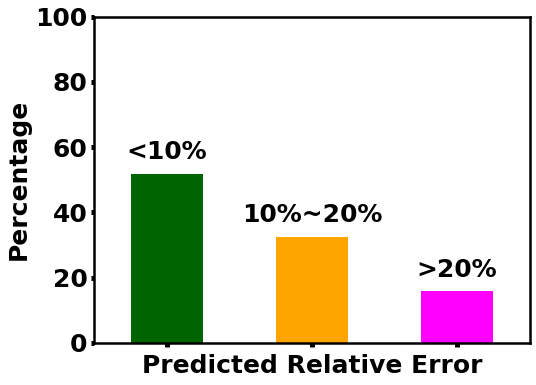

In [15]:
# make the numbers on axis bold

rc('font', weight='bold')

re_less_10 = np.sum(output['Err_pred_des'].values < 10)
print (re_less_10/output['Err_pred_des'].shape)

re_less_20_big_10 = np.sum( (output['Err_pred_des'].values > 10) &  (output['Err_pred_des'].values < 20) )
print (re_less_20_big_10/output['Err_pred_des'].shape)

re_big_20 = np.sum(output['Err_pred_des'].values > 20)
print (re_big_20/output['Err_pred_des'].shape)
plt.close()
plt.figure(figsize = (7.8, 6))


plt.bar(['< 10%', '10% - 20%', '>20%'],
        [re_less_10/len(output), re_less_20_big_10/len(output), re_big_20/len(output)],
        color = ['green', 'blue', 'red'],
        alpha = 0.7)

plt.close()
plt.figure(figsize = (7.8, 6))
frequencies = [re_less_10/len(output)*100, re_less_20_big_10/len(output)*100, re_big_20/len(output)*100]
freq_series = pd.Series(frequencies)
ax = freq_series.plot(kind='bar', color = ['darkgreen', 'orange', 'magenta'])
ax.tick_params(axis='both', which='major', labelsize=28, width=5)
rects = ax.patches
x_labels = [ ]
labels = ['<10%', '10%~20%', '>20%']

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 3, label,fontsize = 25,
            ha='center', va='bottom')
ax.set_xticklabels(x_labels)
plt.ylim(0,100)

plt.yticks(fontsize = 25 )
plt.ylabel("Percentage", fontsize=25, fontweight='bold')
plt.xlabel("Predicted Relative Error", fontsize=25, fontweight='bold')
plt.ylim (0, 100)
plt.savefig('Err_pred_des_dist_3part.jpeg', dpi=500, bbox_inches='tight')

In [16]:
# SMILES with 11 or less HA and high Cv > 46.8
not_HA = "=#()12345dt"
less12HA_50cv_smiles = []
less12HA_50cv_dftcv = []
less12HA_50cv_descv = []

less12HA_count = 0
for count, i in enumerate(output['DFT_cv']):
    if i>46.8:
        for counter, char in enumerate(not_HA):
            if counter==0:
                print (output['SMILES'][count])
                a = output['SMILES'][count]
            a = a.replace(char,"")
            print (a)
        if len(a)<12: 
            less12HA_50cv_smiles.append(output['SMILES'][count])
            less12HA_50cv_dftcv.append(output['DFT_cv'][count])
            less12HA_50cv_descv.append(output['des_cv'][count])
        print (i, count)

less12HA_50cv = pd.DataFrame()
less12HA_50cv ['SMILES'] = less12HA_50cv_smiles
less12HA_50cv ['DFT_cv'] = less12HA_50cv_dftcv
less12HA_50cv ['des_cv'] = less12HA_50cv_descv

less12HA_50cv.to_csv('./output/{}.csv'.format(f'less12HA_50cv'), index=False)


CCCCCCCC(C)C
CCCCCCCC(C)C
CCCCCCCC(C)C
CCCCCCCCC)C
CCCCCCCCCC
CCCCCCCCCC
CCCCCCCCCC
CCCCCCCCCC
CCCCCCCCCC
CCCCCCCCCC
CCCCCCCCCC
CCCCCCCCCC
49.509 489


In [17]:
# SMILES with 10 or less HA and high Cv>48
not_HA = "=#()12345dt"
less11HA_50cv_smiles = []
less11HA_50cv_dftcv = []
less11HA_50cv_descv = []

less11HA_count = 0
for count, i in enumerate(output['DFT_cv']):
    if i>46.8:
        for counter, char in enumerate(not_HA):
            if counter==0:
                print (output['SMILES'][count])
                a = output['SMILES'][count]
            a = a.replace(char,"")
            print (a)
        if len(a)<11: 
            less11HA_50cv_smiles.append(output['SMILES'][count])
            less11HA_50cv_dftcv.append(output['DFT_cv'][count])
            less11HA_50cv_descv.append(output['des_cv'][count])
        print (i, count)

less11HA_50cv = pd.DataFrame()
less11HA_50cv ['SMILES'] = less11HA_50cv_smiles
less11HA_50cv ['DFT_cv'] = less11HA_50cv_dftcv
less11HA_50cv ['des_cv'] = less11HA_50cv_descv

less11HA_50cv.to_csv('./output/{}.csv'.format(f'less11HA_50cv'), index=False)


CCCCCCCC(C)C
CCCCCCCC(C)C
CCCCCCCC(C)C
CCCCCCCCC)C
CCCCCCCCCC
CCCCCCCCCC
CCCCCCCCCC
CCCCCCCCCC
CCCCCCCCCC
CCCCCCCCCC
CCCCCCCCCC
CCCCCCCCCC
49.509 489
